Current: checkpoint8_30_30_90_6319_7280_2025-10-02.pth, env8_30_30_2025-10-02.obj


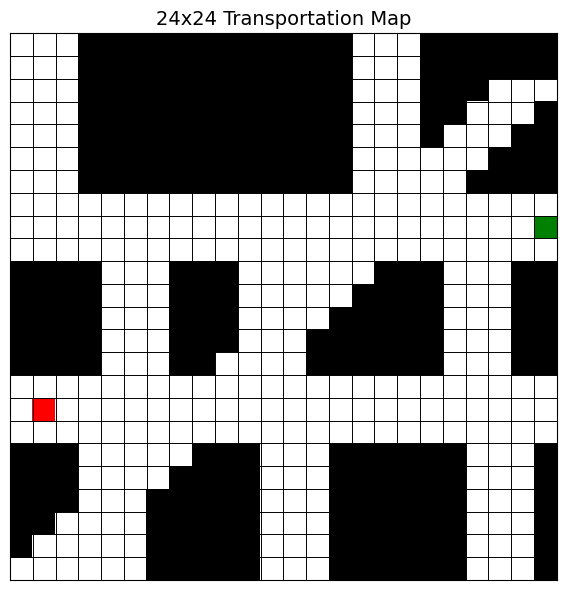

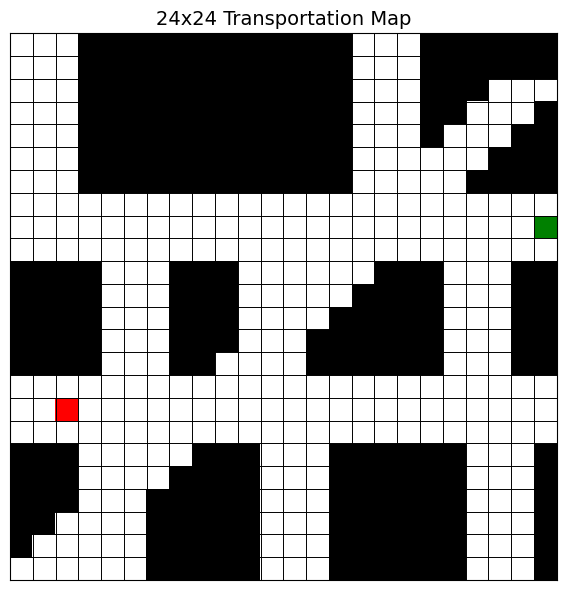

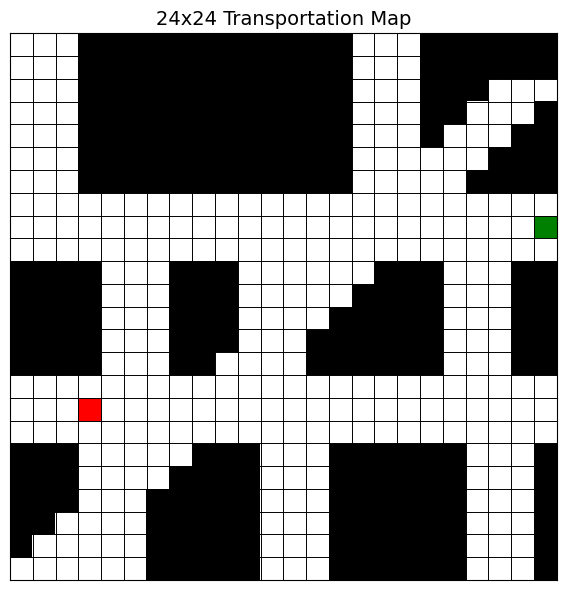

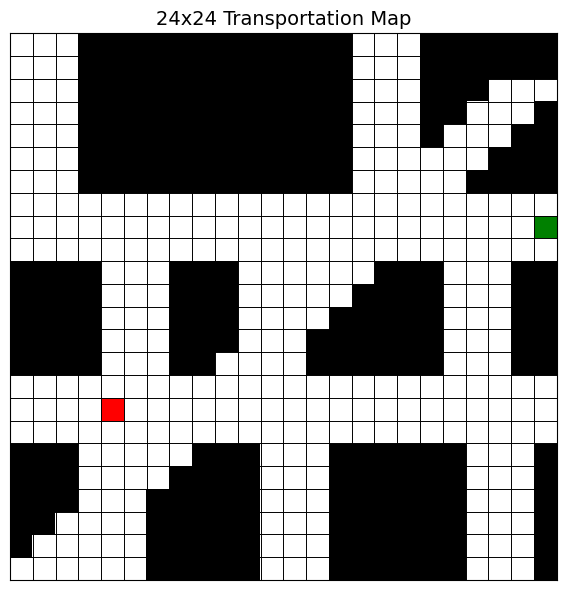

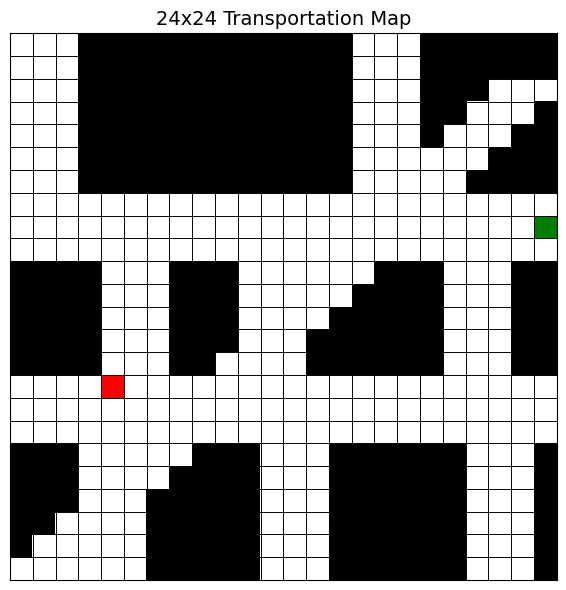

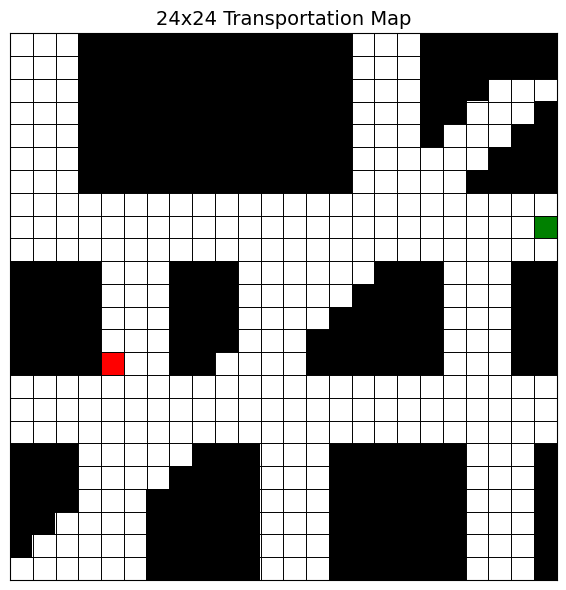

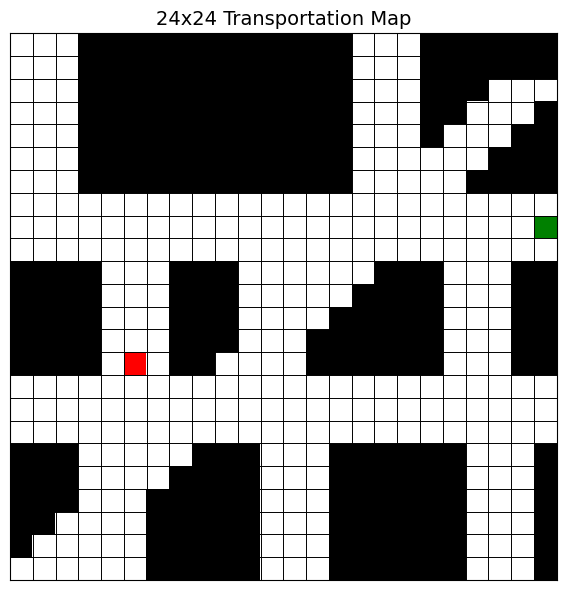

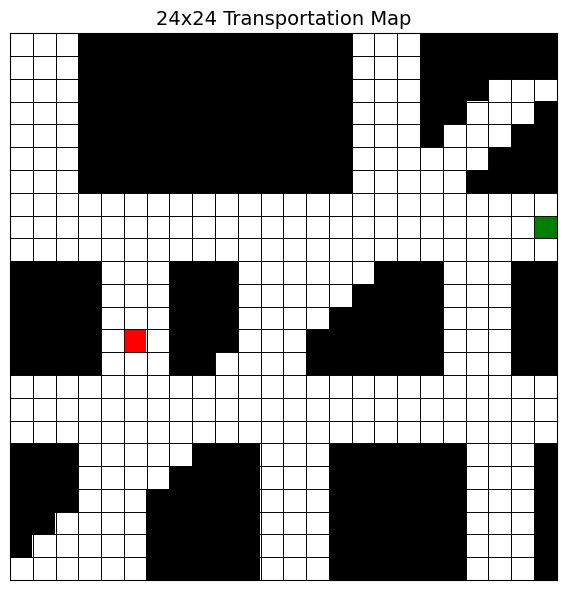

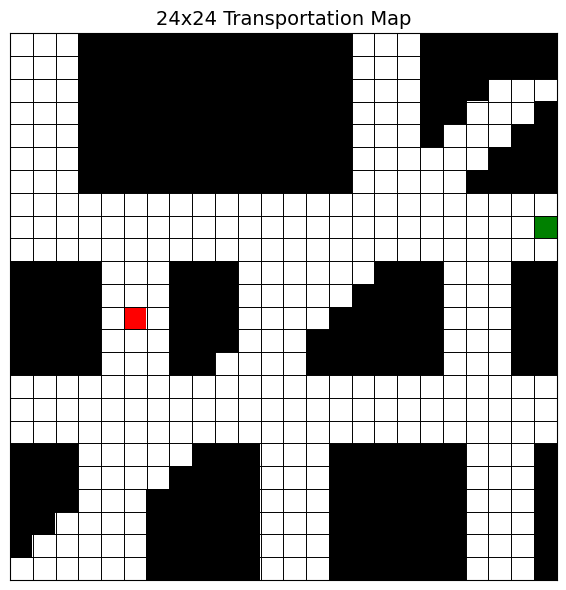

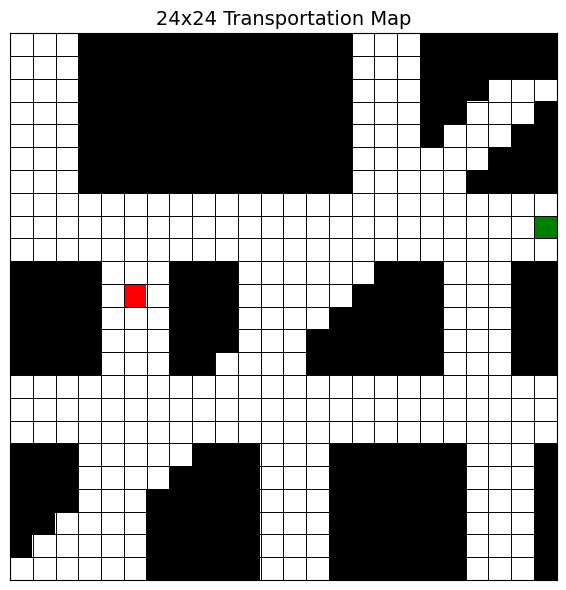

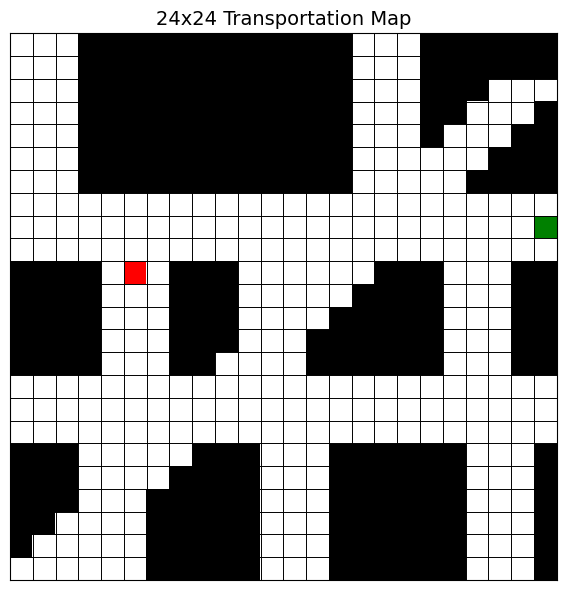

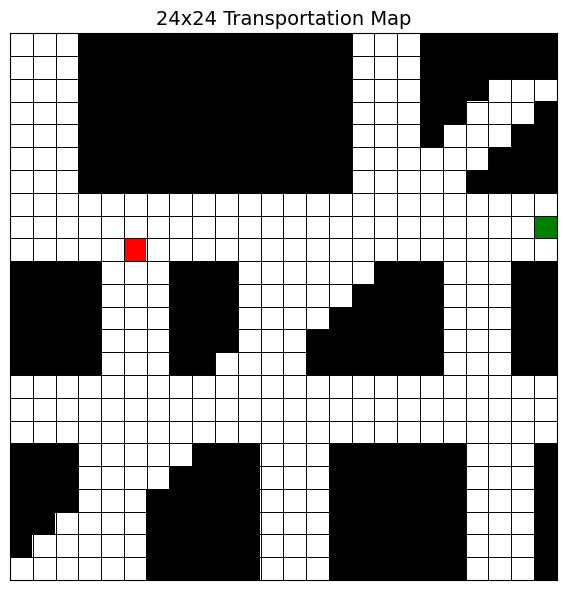

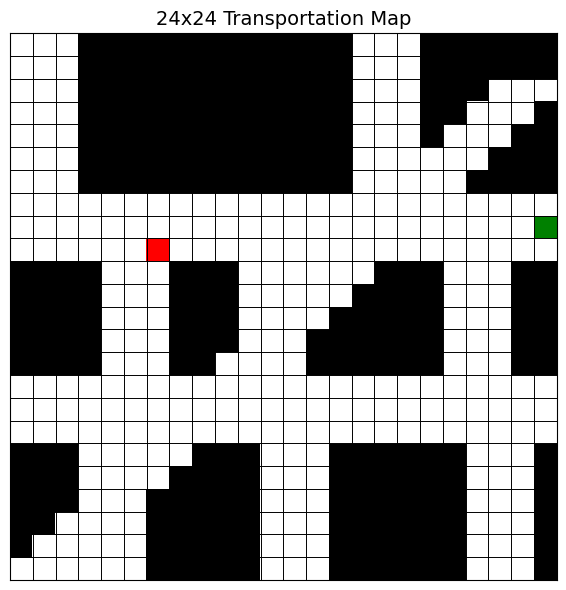

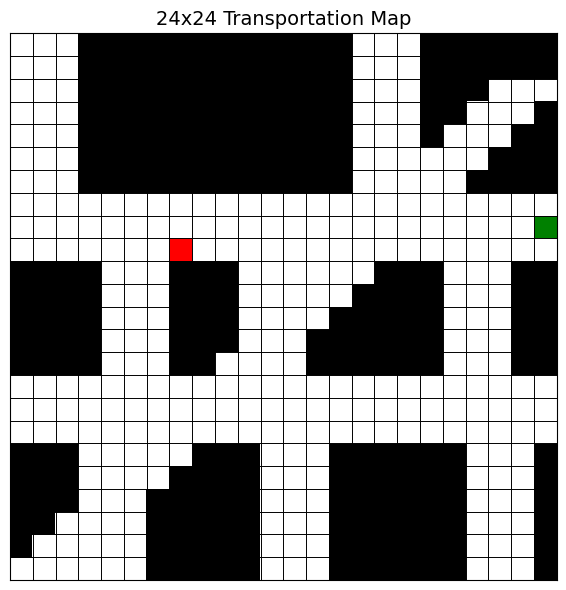

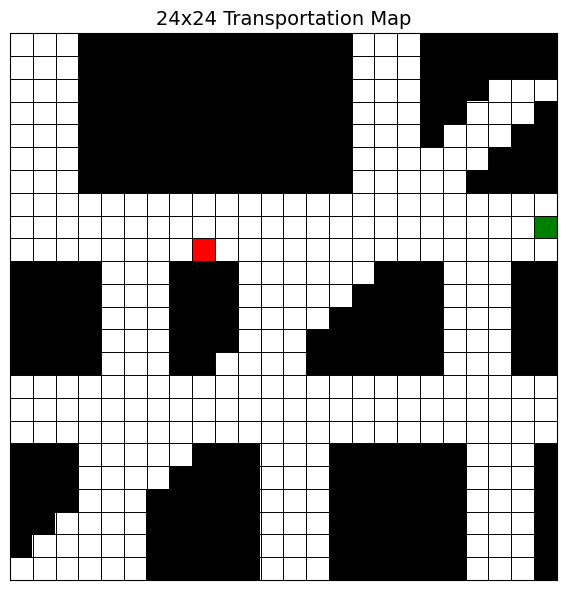

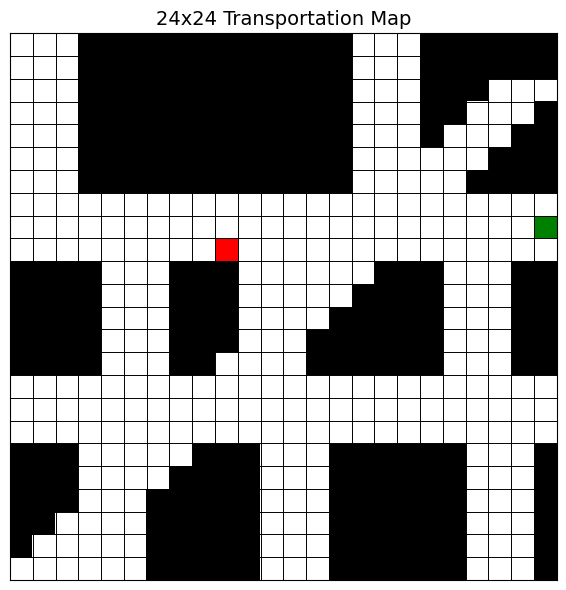

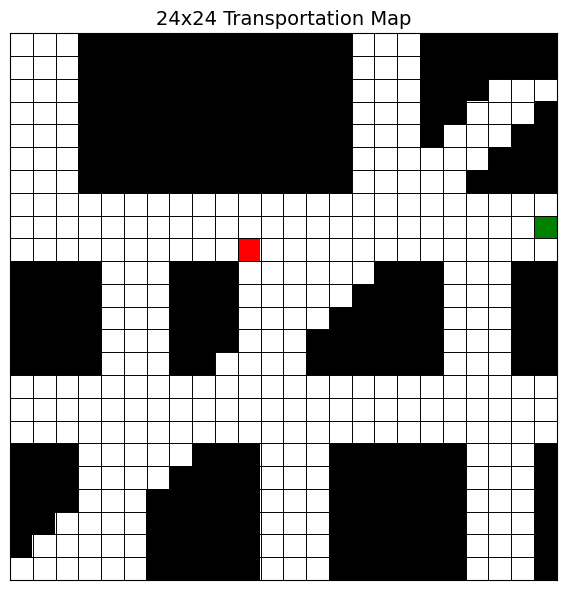

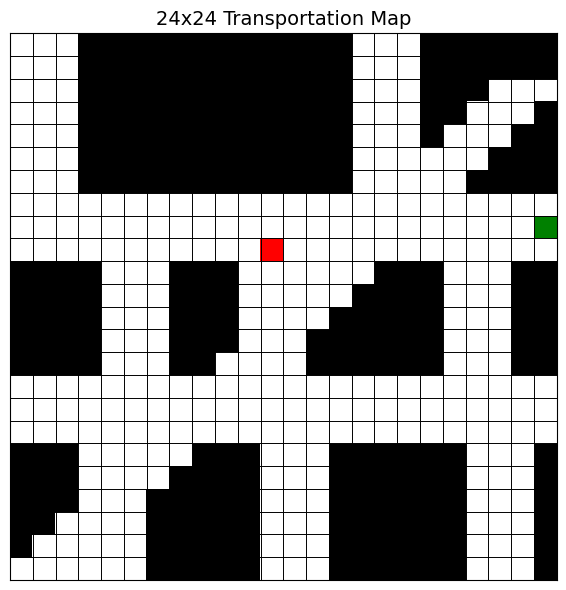

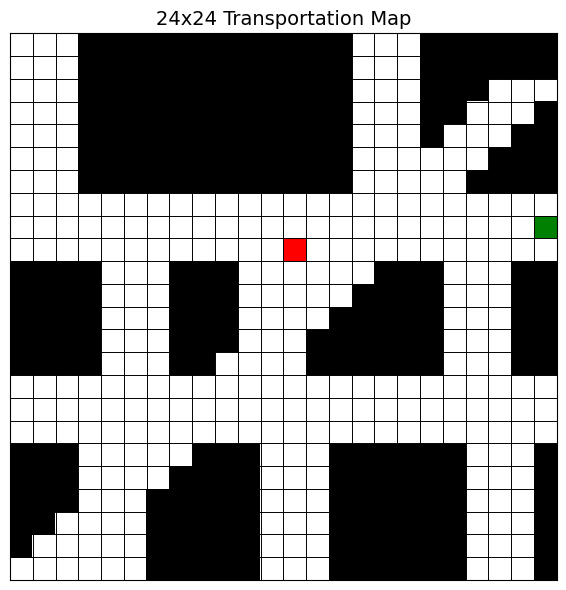

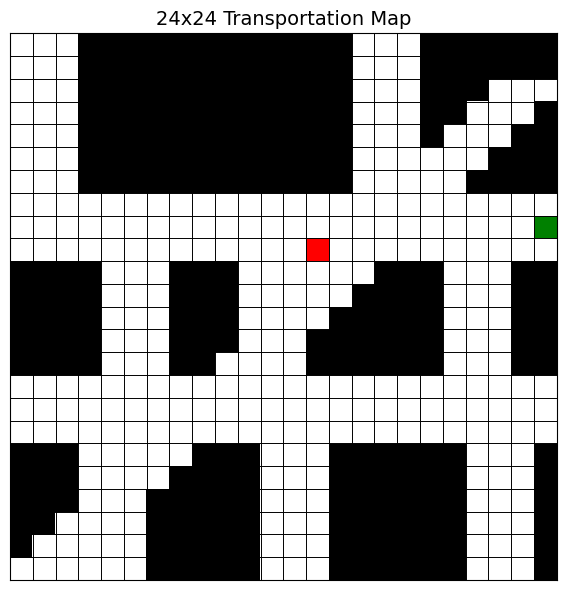

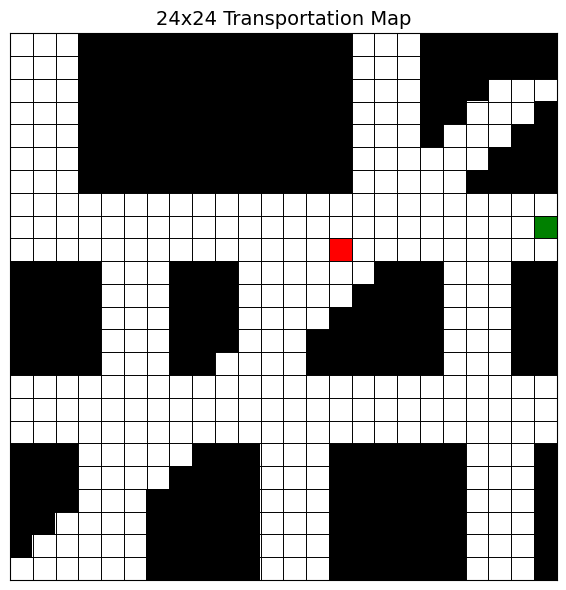

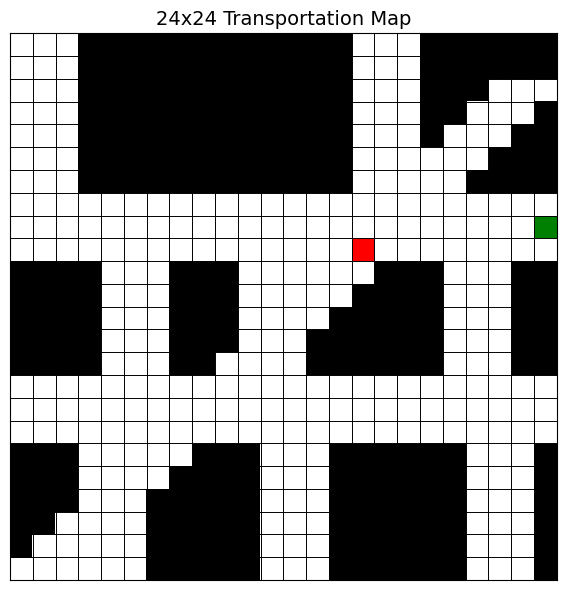

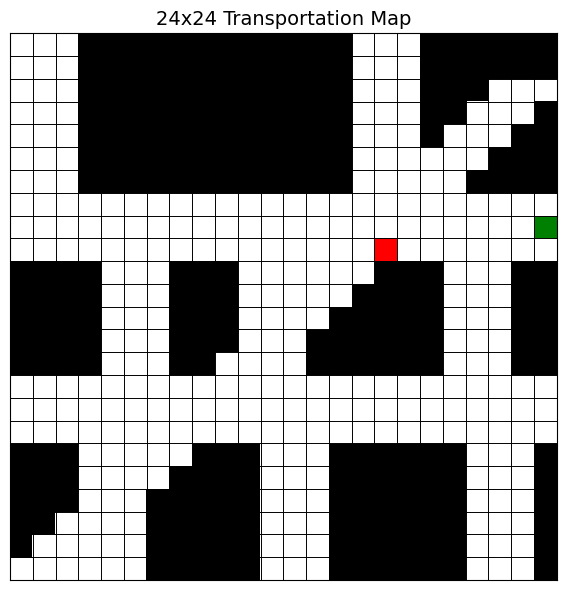

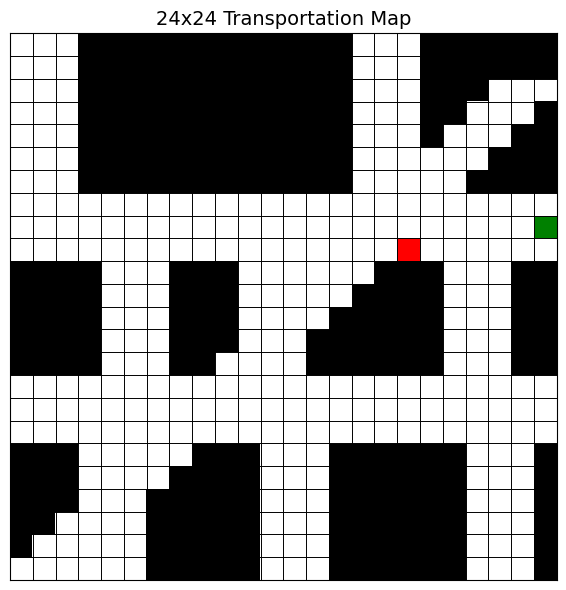

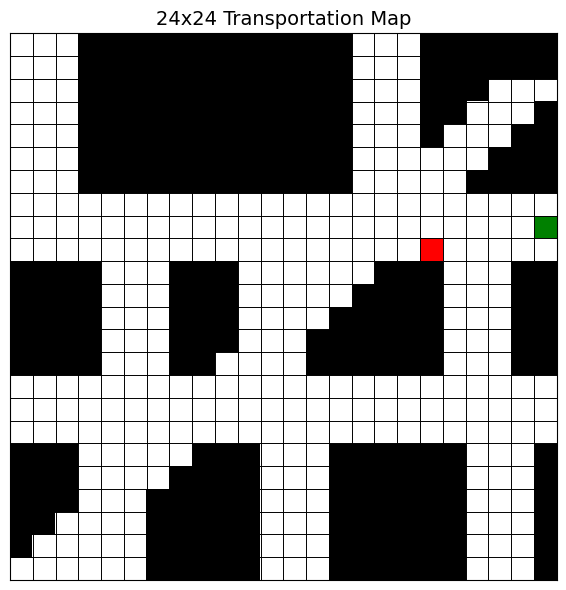

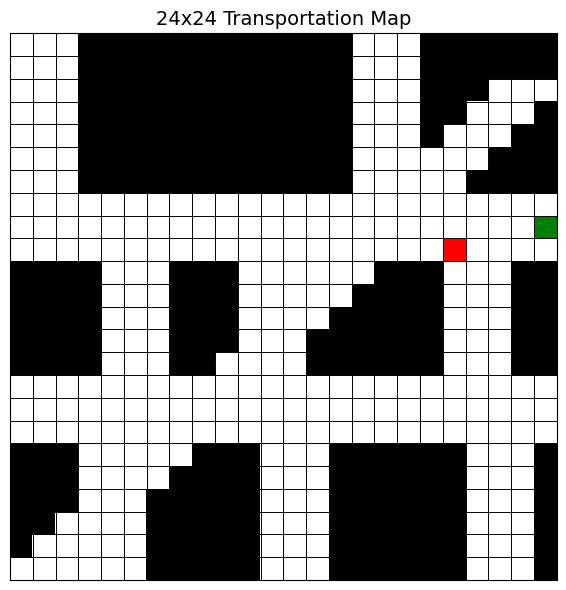

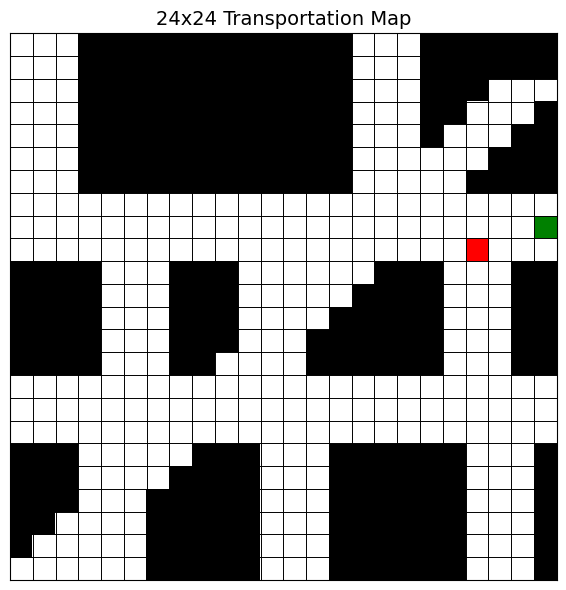

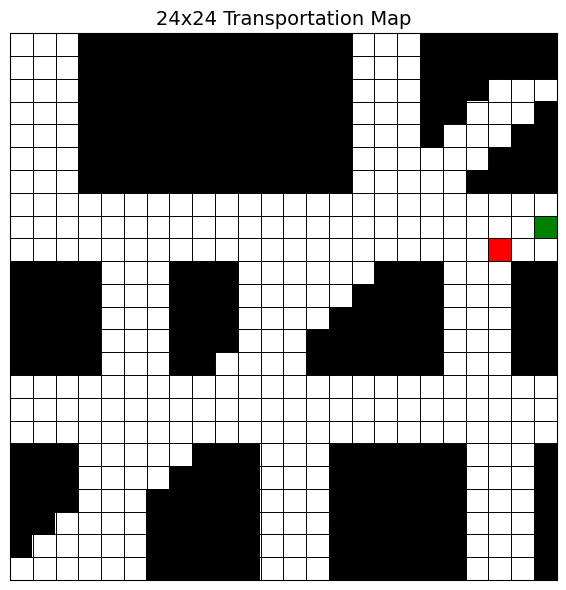

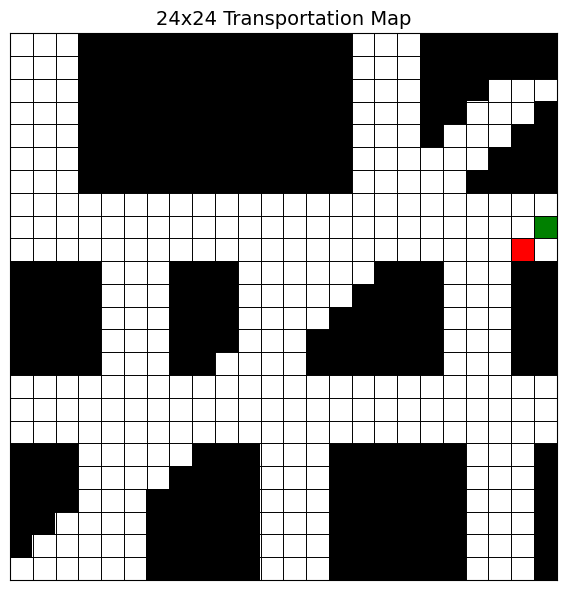

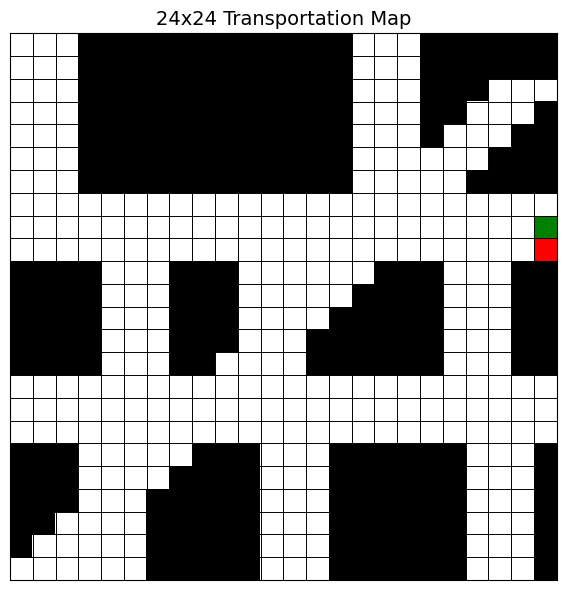

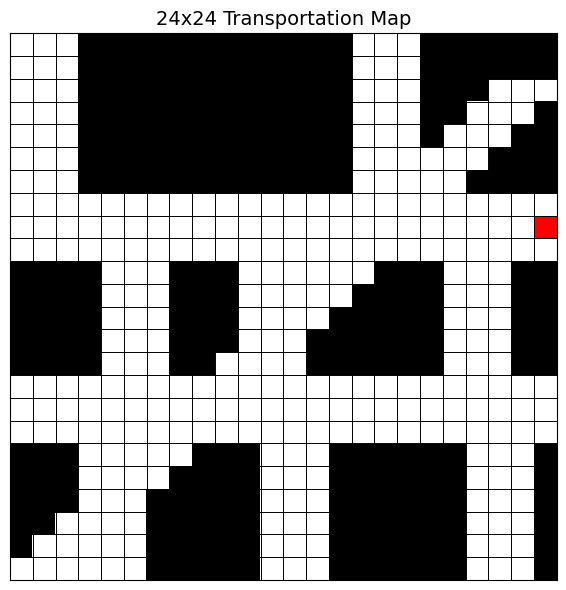

<<< Win >>>
===== Inference Done =====
ep_replay info: (31, 3, 24, 24) <class 'numpy.ndarray'>


Proceed?(Enter "go" to proceed, "done" to stop.):  done


Inference terminated...


In [32]:
from lib.env_manager_final import PathFindEnv
from lib.dqn_utils_final import DQN
from IPython.display import clear_output

env = PathFindEnv(height=24, width=24)
dqn = DQN(train=False, input_size=24)

checkpoints = os.listdir(os.path.join(os.getcwd(), "checkpoints"))
env_info_files = os.listdir(os.path.join(os.getcwd(), "envs"))

ep_replay = None # 에피소드 진행 과정에서의 모든 스텝 기록
stop = False
for pathes in zip(checkpoints, env_info_files):
    clear_output(wait=True)

    print(f"Current: {pathes[0]}, {pathes[1]}")

    # env_info: (tp_map, src_pos, dest_pos)
    env_info = env.restore(pathes[1]) # 환경 복원
    ep_replay = dqn.inference(env=env, init_state=env_info[0], checkpoint=pathes[0], verbose=True)
    print("ep_replay info:", ep_replay.shape, type(ep_replay))

    while True:
        keyward = input("Proceed?(Enter \"go\" to proceed, \"done\" to stop.): ")
        match keyward:
            case "go":
                break
            case "done":
                stop = True
                print("Inference terminated...")
                break
            case _:
                print("Wrong keyward input. Please rewrite right keyward...")
                continue

    # 추론을 정지하는 경우
    if stop:
        break